In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/윤보경/Desktop/nlp_practice/iris.csv',encoding='latin1')
# 예를 들어윈도우 바탕화면에서 작업한 저자의 경우에는
# data = pd.read_csv(r'C:\Users\USER\Desktop\iris.csv',encoding='latin1')

In [2]:
print(len(data)) # 총 샘플의 개수 출력
print(data[:5]) # 샘플 중 5개 출력

150
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


In [4]:
print("품종 종류:", data["variety"].unique(), sep="\n")
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력

품종 종류:
['Setosa' 'Versicolor' 'Virginica']


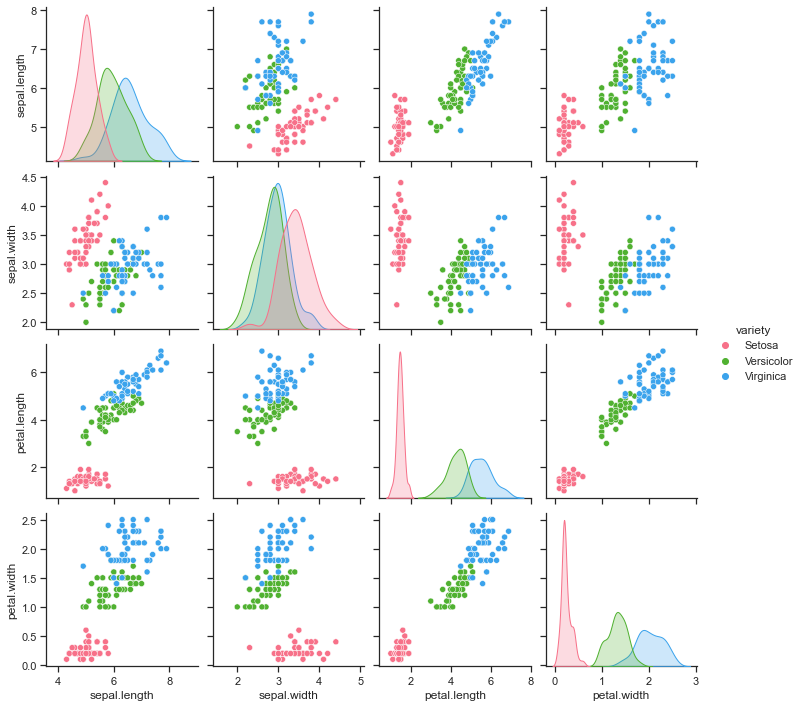

In [5]:
import seaborn as sns
#del data['Id'] # 인덱스 열 삭제
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="variety", palette="husl")

c:\users\윤보경\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

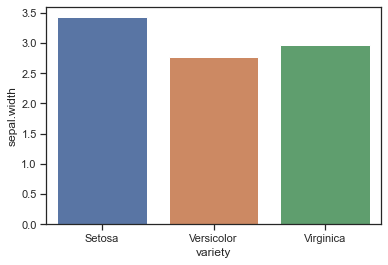

In [6]:
sns.barplot(data['variety'], data['sepal.width'], ci=None)

<AxesSubplot:>

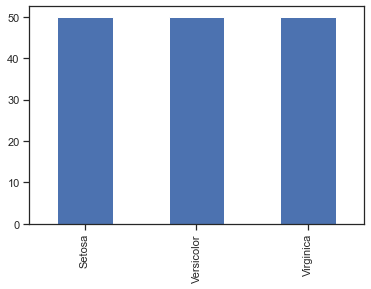

In [7]:
import matplotlib.pyplot as plt
data['variety'].value_counts().plot(kind='bar')

<AxesSubplot:>

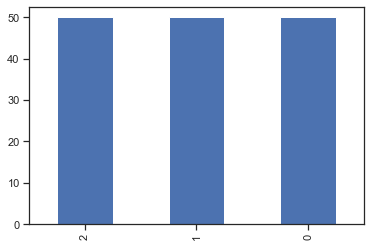

In [8]:
data['variety'] = data['variety'].replace(['Virginica','Setosa','Versicolor'],[0,1,2])
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['variety'].value_counts().plot(kind='bar')

In [9]:
from sklearn.model_selection import train_test_split
data_X = data[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values # X 데이터에 해당됩니다. X는 총 4개입니다.
data_y = data['variety'].values # Y 데이터에 해당됩니다. 예측해야하는 값입니다.

print(data_X[:5]) #X에 해당되는 데이터를 10개만 출력합니다.
print(data_y[:5]) #y에 해당되는 데이터를 10개만 출력합니다.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [11]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Epoch 1/200
120/120 [==============================] - 2s 7ms/step - loss: 2.5016 - accuracy: 0.3322 - val_loss: 1.3105 - val_accuracy: 0.3667
Epoch 2/200
120/120 [==============================] - 0s 2ms/step - loss: 1.2538 - accuracy: 0.3492 - val_loss: 0.8569 - val_accuracy: 0.4000
Epoch 3/200
120/120 [==============================] - 0s 2ms/step - loss: 0.8824 - accuracy: 0.4199 - val_loss: 0.7907 - val_accuracy: 0.4667
Epoch 4/200
120/120 [==============================] - 0s 2ms/step - loss: 0.7731 - accuracy: 0.5363 - val_loss: 0.7907 - val_accuracy: 0.5667
Epoch 5/200
120/120 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.6113 - val_loss: 0.7545 - val_accuracy: 0.5667
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 0.7956 - accuracy: 0.4327 - val_loss: 0.7403 - val_accuracy: 0.5667
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.6321 - val_loss: 0.7289 - val_accuracy: 0.5667

Epoch 58/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8634 - val_loss: 0.3936 - val_accuracy: 0.8667
Epoch 59/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8917 - val_loss: 0.3841 - val_accuracy: 0.9667
Epoch 60/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.9112 - val_loss: 0.3753 - val_accuracy: 0.9667
Epoch 61/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.9380 - val_loss: 0.3927 - val_accuracy: 0.8333
Epoch 62/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8667 - val_loss: 0.3888 - val_accuracy: 0.8333
Epoch 63/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.9085 - val_loss: 0.3741 - val_accuracy: 0.9667
Epoch 64/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.9504 - val_loss: 0.3734 - val_accuracy:

Epoch 115/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.9878 - val_loss: 0.2733 - val_accuracy: 0.9667
Epoch 116/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9305 - val_loss: 0.2711 - val_accuracy: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2383 - accuracy: 0.9800 - val_loss: 0.2700 - val_accuracy: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.9459 - val_loss: 0.2802 - val_accuracy: 0.9667
Epoch 119/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.9674 - val_loss: 0.2838 - val_accuracy: 0.9333
Epoch 120/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.9695 - val_loss: 0.2807 - val_accuracy: 0.9333
Epoch 121/200
120/120 [==============================] - ETA: 0s - loss: 0.2561 - accuracy: 0.95 - 0s 2ms/step - loss: 0.2524 - ac

120/120 [==============================] - 0s 2ms/step - loss: 0.1751 - accuracy: 0.9675 - val_loss: 0.2136 - val_accuracy: 0.9667
Epoch 172/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9762 - val_loss: 0.2135 - val_accuracy: 0.9667
Epoch 173/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9408 - val_loss: 0.2125 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9777 - val_loss: 0.2192 - val_accuracy: 0.9667
Epoch 175/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9777 - val_loss: 0.2081 - val_accuracy: 1.0000
Epoch 176/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1815 - accuracy: 0.9853 - val_loss: 0.1964 - val_accuracy: 1.0000
Epoch 177/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1865 - accuracy: 0.9433 - val_loss: 0.2047 - val_accuracy: 1.0000

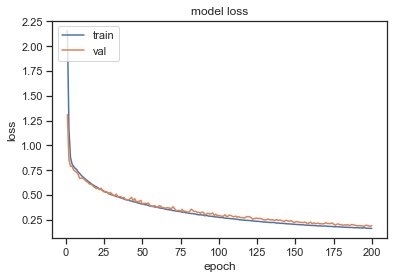

In [12]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

1/1 [==============================] - 0s 87ms/step - loss: 0.1917 - accuracy: 1.0000

 테스트 정확도: 1.0000
